In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
file = '../publication_database.csv'
images = '../publication_images'
import matplotlib.pyplot as plt
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth
import matplotlib.cm as cm

ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('olivine')
model_list = []
for name in model_names:
    model_list.append([ecdatabase.get_model_properties(name)['year'].values[0],name])
model_list = sorted(model_list,key=lambda x: x[0])
model_list = [x[1] for x in model_list]
model_list

['SEO2_ol',
 'xu_2000_ol[001]',
 'xu_2000_ol[010]',
 'xu_2000_ol[100]',
 'xu_2000_poly_ol',
 'dF_05_ol[100]',
 'dF_05_ol[010]',
 'dF_05_ol[001]',
 'SEO3_ol',
 'wang_06_ol',
 'dk_2009_ol',
 'ty_09_ol',
 'ty_12_ol',
 'yang_12b_ol[100]',
 'yang_12b_ol[010]',
 'yang_12b_ol[001]',
 'gar_14_bell_ol[100]',
 'gar_14_bell_ol[010]',
 'gar_14_bell_ol[001]',
 'gar_14_withers_ol[100]',
 'gar_14_withers_ol[010]',
 'gar_14_withers_ol[001]',
 'y_16_ol[100]',
 'y_16_ol[010]',
 'y_16_ol[001]',
 'nv_17_ol[100]',
 'nv_17_ol[010]',
 'nv_17_ol[001]',
 'sun_19ol[100]',
 'sun_19ol[001]',
 'fei_20_ol[100]',
 'fei_20_ol[010]',
 'fei_20_ol[001]']

# Exploring Pyrrhenious's Olivine Models Database Correspondence

Here we look at Plagioclaise models parameterization correspondence of:

 * Constable et al., 1992. The Electrical Conductivity of an Isotropic Olivine Mantle 
 
 * Xu et al., 2000. Pressure effect on electrical conductivity of mantle olivine 
 
 * DuFrane et al., 2005. Anisotropy of electrical conductivity in dry olivine
 
 * Constable S. 2006. SEO3: A new model of olivine electrical conductivity
 
 * Wang et al., 2006. The effect of water on the electrical conductivity of olivine
 
 * Dai and Karato 2009. Dai Lidong, Karato Shun-ichiro.
 
 * Yoshino et al., 2009. The effect of water on the electrical conductivity of olivine aggregates and its implications for the electrical structure of the upper mantle 
 
 * Yoshino et al., 2012. Effect of temperature, pressure and iron content on the electrical conductivity of olivine and its high-pressure polymorphs
 
 * Yang X. 2012. Orientation-related electrical conductivity of hydrous olivine, clinopyroxene and plagioclase and implications for the structure of the lower continental crust and uppermost mantle
 
 * Gardes et al., 2014. Toward a unified hydrous olivine electrical conductivity law.
 
 * Yoshino et al.,  2016. Pressure dependence of electrical conductivity in forsterite
 
 * Novella et al., 2017. Hydrogen self-diffusion in single crystal olivine and electrical conductivity of the Earth’s mantle.
 
 * Sun et al., 2019. H-D Interdiffusion in Single-Crystal Olivine: Implications for Electrical Conductivity in the Upper Mantle.
 
 * Fei et al., 2020. The Effect of Water on Ionic Conductivity in Olivine.
 

Dai and Karato 2009: had to adjust preexp log upwards by 0.2 for first mechanism. Second mechanism had to be adjusted downward 0.4 log units in the preexp. The second enthalpy also needed adjustment. 



## SEO2: Constable 1992

(-7.0, -1.0)

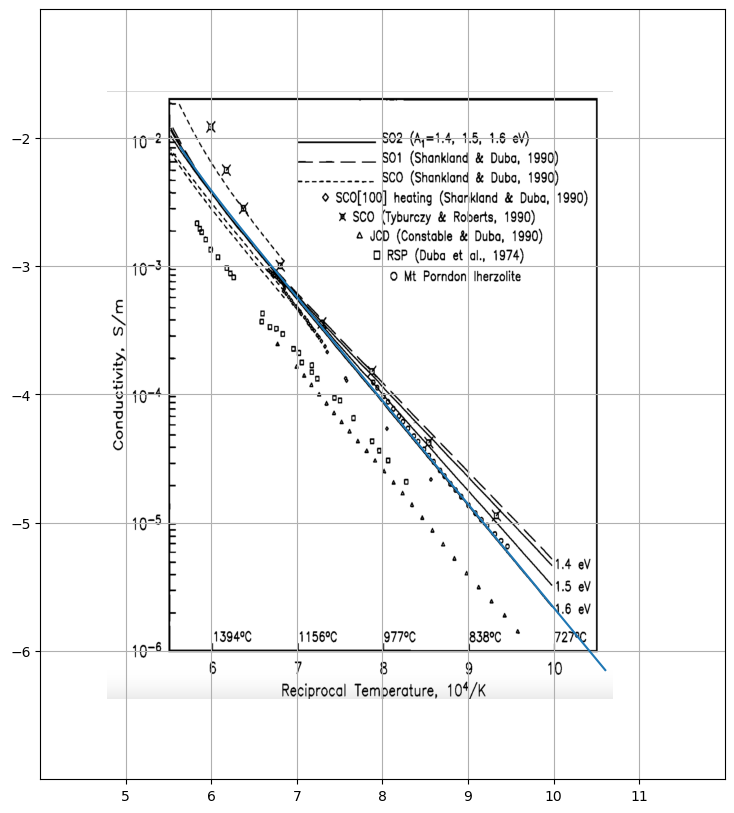

In [2]:
ec_model_row = ecdatabase.get_model_properties('SEO2_ol')
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range =np.linspace(ec_model_row['temp_min']-50,ec_model_row['temp_max'],num=100,dtype=float).ravel()

for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    ecmodel = ecdatabase.get_model('SEO2_ol')
     
    c = ecmodel.get_conductivity(T=temperature_range)
    ax.plot(1e4/temperature_range,
    np.log10(c))

        
plt.xlim([4,12])
plt.ylim([-7,-1])


## Xu and Shankland 2000

/Volumes/MT_RESEARCH/2D_Petrology/mineral_conductivity/mineralconductivities/publication correspondence/../pyrrhenious/database.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subframe['grouping_id'] = subframe['entry_id'].str.slice(stop=-5)
/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_6592/2135496894.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.plot(1e4/temperature_range,np.log10(conductivity),linestyle=linestyle,linewidth=3,color = cm.get_cmap('jet')(P/10))
/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_6592/2135496894.py:34: Matplot

xu_2000_ol[001]:{10^2.67(0.14) exp(-(1.5(0.04) + P0.86(0.15))/kT)}
xu_2000_ol[010]:{10^2.39(0.06) exp(-(1.17(0.04) + P0.96(0.06))/kT)}
xu_2000_ol[100]:{10^3.33(0.28) exp( -1.79(0.08)/kT)}


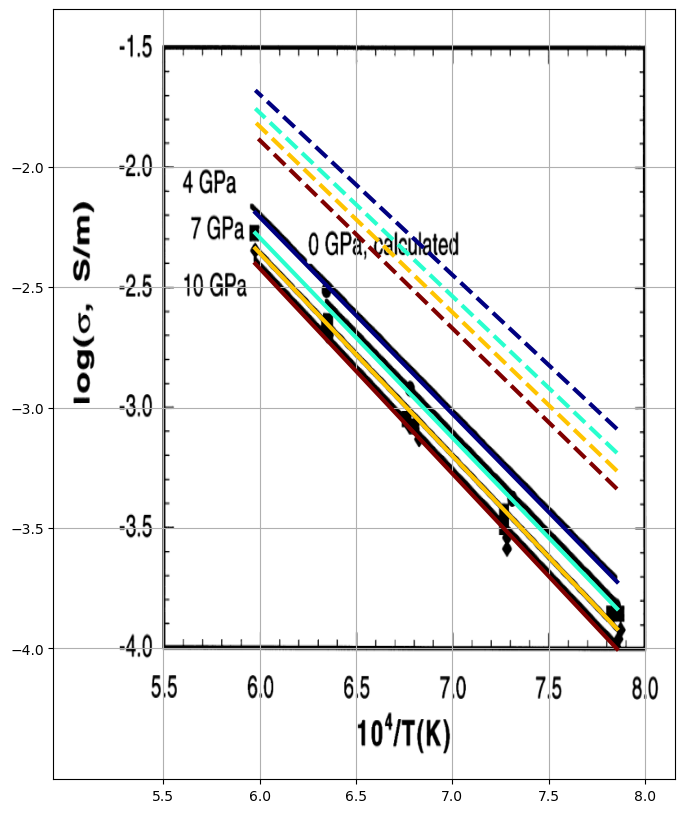

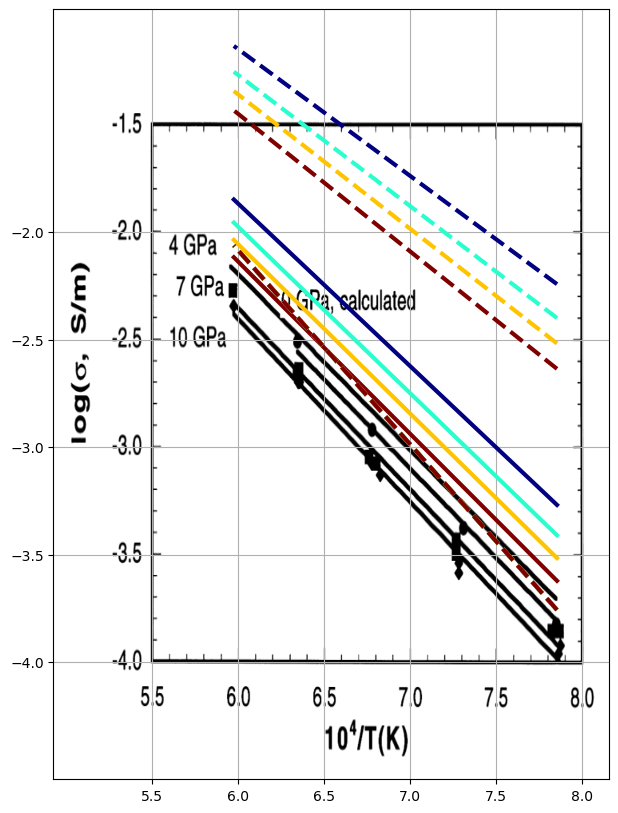

In [3]:
ecdatabase = database.Database(file)
ecdatabase.create_anisotropic_models()
model = 'xu_2000_ol[001]'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=10,dtype=float).ravel()
model = ecdatabase.get_model(model)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model in ['xu_2000_poly_ol','isotropic_model:xu_2000_ol[001]+xu_2000_ol[010]+xu_2000_ol[100]']:
        ecmodel = ecdatabase.get_model(model)
        
        if 'poly' in model:
            linestyle='-'
        else:
            linestyle='--'
        for P in [0,4,7,10]:
            conductivity = ecmodel.get_conductivity(T=temperature_range,P=P)
            ax.plot(1e4/temperature_range,np.log10(conductivity),linestyle=linestyle,linewidth=3,color = cm.get_cmap('jet')(P/10))
        
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model in ['xu_2000_ol[001]','xu_2000_ol[010]','xu_2000_ol[100]']:
        ecmodel = ecdatabase.get_model(model)
        print(ecmodel)
        if '[001]' in model:
            linestyle='-'
        elif '[010]':
            linestyle='--'
        else:
            linestyle=':'
        for P in [0,4,7,10]:
            conductivity = ecmodel.get_conductivity(T=temperature_range,P=P)
            ax.plot(1e4/temperature_range,np.log10(conductivity),linestyle=linestyle,linewidth=3,color = cm.get_cmap('jet')(P/10))
    

## DuFrane 2005

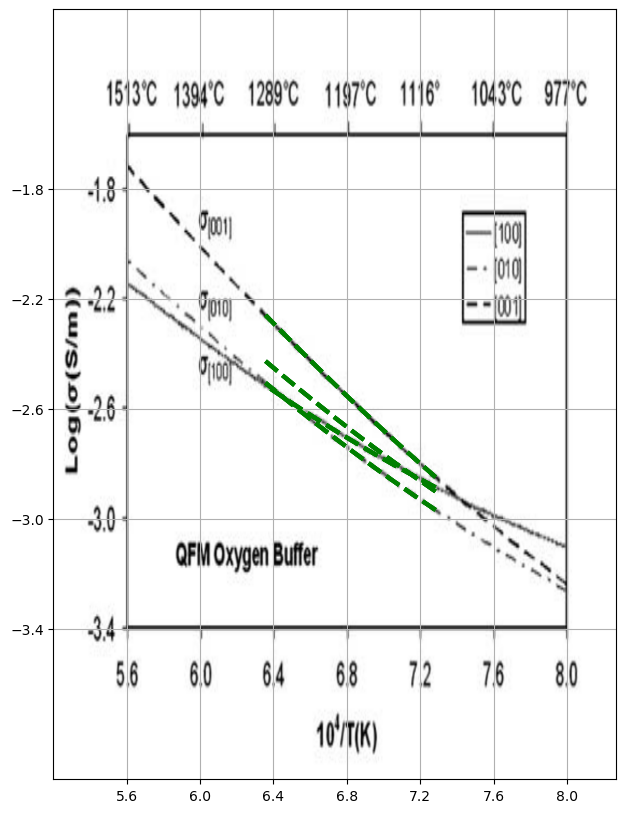

In [4]:
model = 'dF_05_ol[100]'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=10,dtype=float).ravel()
model = ecdatabase.get_model(model)
logfo2 = pyrutils.calc_QFM(temperature_range,0)

for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model in ['dF_05_ol[100]','dF_05_ol[010]','dF_05_ol[001]',
                  'isotropic_model:dF_05_ol[100]+dF_05_ol[010]+dF_05_ol[001]']:
        ecmodel = ecdatabase.get_model(model)
        
        if 'aniso' in model:
            linestyle='-'
            color='red'
        else:
            color = 'green'
            linestyle='--'
        for P in [0,4,7,10]:
            conductivity = np.log10(ecmodel.get_conductivity(T=temperature_range,P=P,logfo2=logfo2))
            ax.plot(1e4/temperature_range,conductivity,linestyle=linestyle,linewidth=3,color = color)
        

## SEO3 Constable 2006

(-7.0, 0.0)

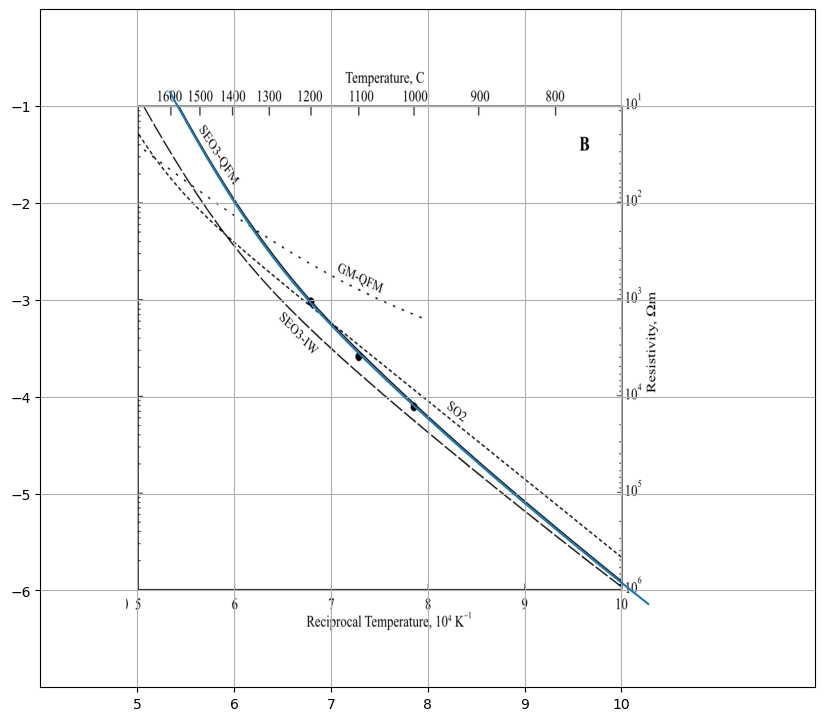

In [5]:
ec_model_row = ecdatabase.get_model_properties('SEO3_ol')
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temp      = np.linspace(700,1600,num=100)+273.15
pressure  = np.linspace(3,10,num=100)
logfo2 = pyrutils.calc_QFM(temp,pressure)

for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    ecmodel = ecdatabase.get_model('SEO3_ol')
     
    c = ecmodel.get_conductivity(T=temp,logfo2=logfo2)
    ax.plot(1e4/temp,
    np.log10(c))

        
plt.xlim([4,12])
plt.ylim([-7,0])

## Wang et al., 2006

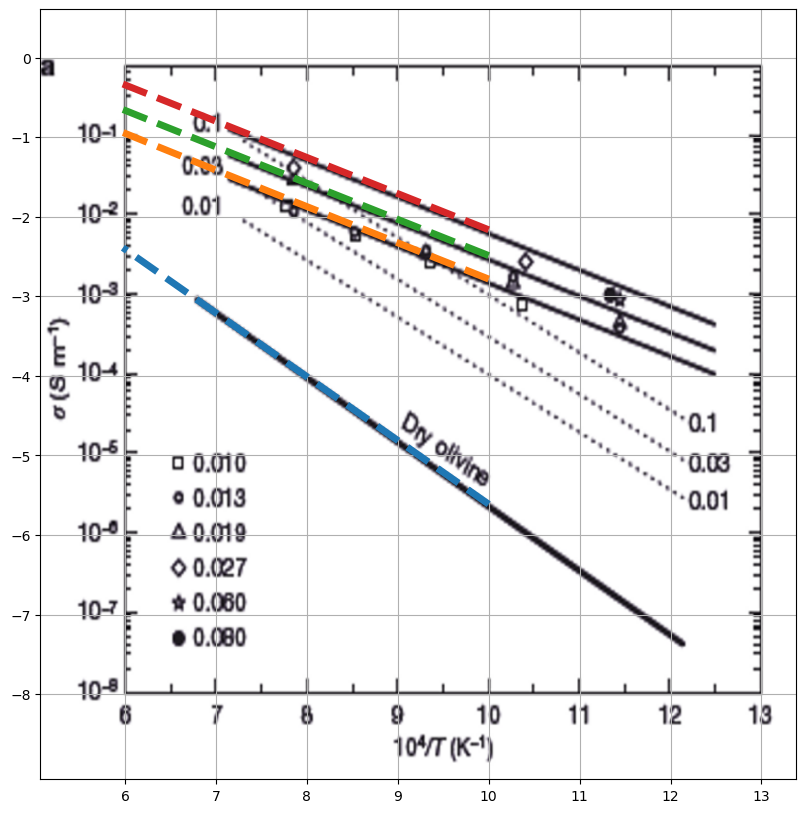

In [6]:
ec_model_row = ecdatabase.get_model_properties('wang_06_ol')
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range =np.linspace(1000,1673,num=100,dtype=float).ravel()
pressure  = np.linspace(4,10,num=len(temperature_range))
logfo2 = pyrutils.calc_QFM(temperature_range,pressure)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i==0:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    ecmodel = ecdatabase.get_model('wang_06_ol')
     
    for water in [0,0.01,0.03,0.1]:
        c = ecmodel.get_conductivity(T=temperature_range,logfo2=logfo2,Cw=water*1e4)
        ax.plot(1e4/temperature_range,np.log10(c),linewidth=5,linestyle='--')

        
#plt.xlim([4,12])
#plt.ylim([-7,0])

## Dai and Karato 2009

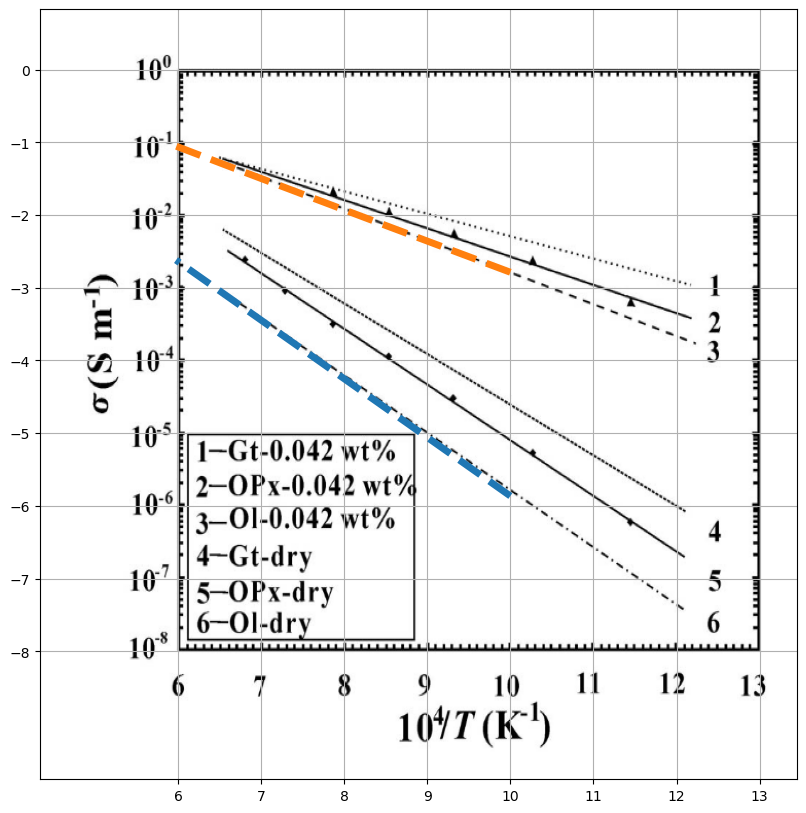

In [7]:
ec_model_row = ecdatabase.get_model_properties('dk_2009_ol')
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range =np.linspace(1000,1673,num=100,dtype=float).ravel()
pressure  = np.linspace(4,10,num=len(temperature_range))
logfo2 = pyrutils.calc_QFM(temperature_range,pressure)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    ecmodel = ecdatabase.get_model('dk_2009_ol')
     
    for water in [0,0.042]:
        c = ecmodel.get_conductivity(T=temperature_range,logfo2=logfo2,Cw=water*1e4)
        ax.plot(1e4/temperature_range,np.log10(c),linewidth=5,linestyle='--')

## Yoshino et al., 2009

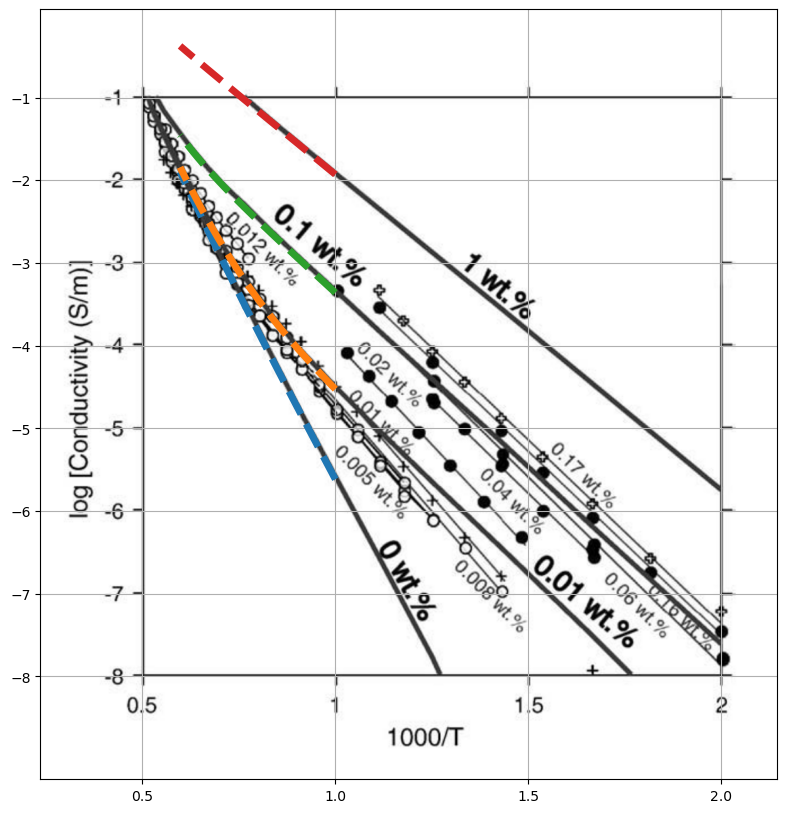

In [8]:
ec_model_row = ecdatabase.get_model_properties('ty_09_ol')
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range =np.linspace(1000,1673,num=100,dtype=float).ravel()
pressure  = np.linspace(4,10,num=len(temperature_range))
logfo2 = pyrutils.calc_QFM(temperature_range,pressure)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    ecmodel = ecdatabase.get_model('ty_09_ol')
     
    for water in [0,0.01,0.1,1]:
        c = ecmodel.get_conductivity(T=temperature_range,logfo2=logfo2,Cw=water*1e4)
        ax.plot(1e3/temperature_range,np.log10(c),linewidth=5,linestyle='--')

## Yoshino et al., 2012

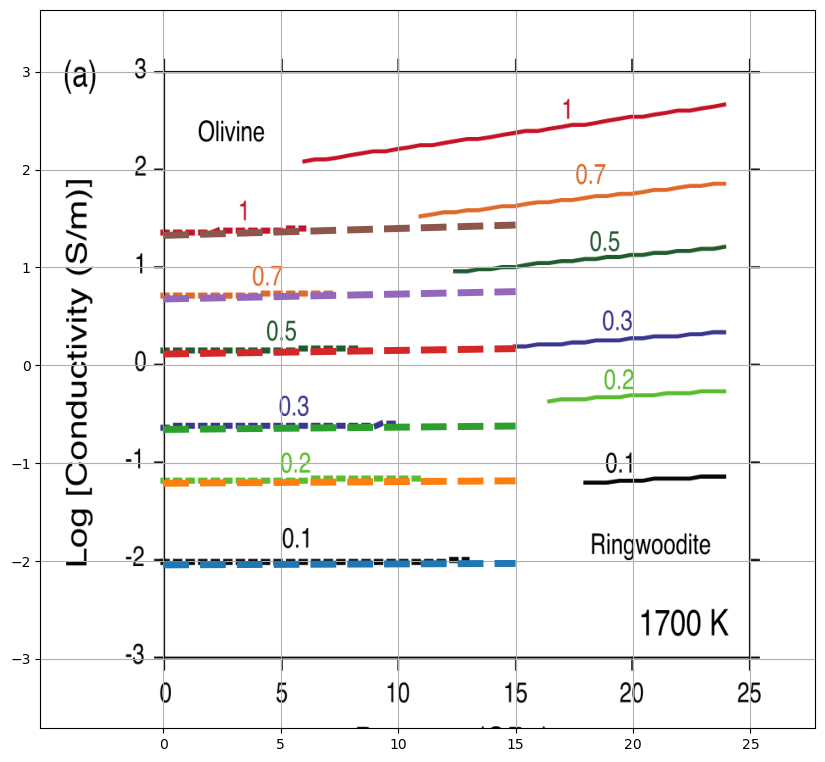

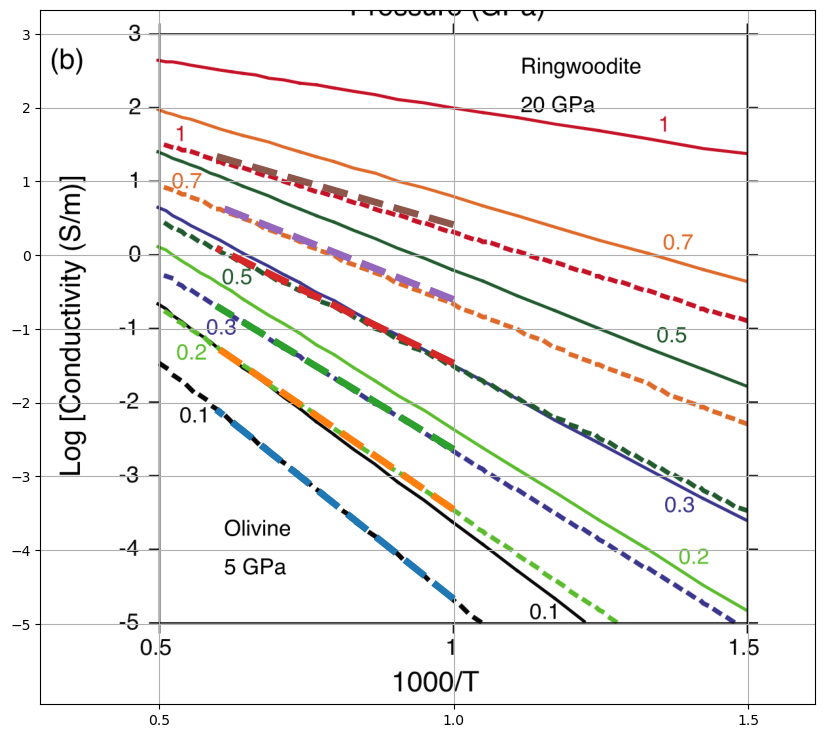

In [9]:
ec_model_row = ecdatabase.get_model_properties('ty_12_ol')
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range =np.linspace(1000,1673,num=100,dtype=float).ravel()
pressure  = np.linspace(4,10,num=len(temperature_range))
logfo2 = pyrutils.calc_QFM(temperature_range,pressure)
ecmodel = ecdatabase.get_model('ty_12_ol')

for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i>1:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    if i==0:
        P=np.linspace(0,15)
        for iron in [0.1,0.2,0.3,0.5,0.7,1]:
            c = ecmodel.get_conductivity(T=1700,X_fe=iron,P=P)
            ax.plot(P,np.log10(c),linewidth=5,linestyle='--')
            
    elif i==1:
        for iron in [0.1,0.2,0.3,0.5,0.7,1]:
            c = ecmodel.get_conductivity(T=temperature_range,X_fe=iron,P=5)
            ax.plot(1e3/temperature_range,np.log10(c),linewidth=5,linestyle='--')

## Yang X. 2012

(-9.0, -0.5)

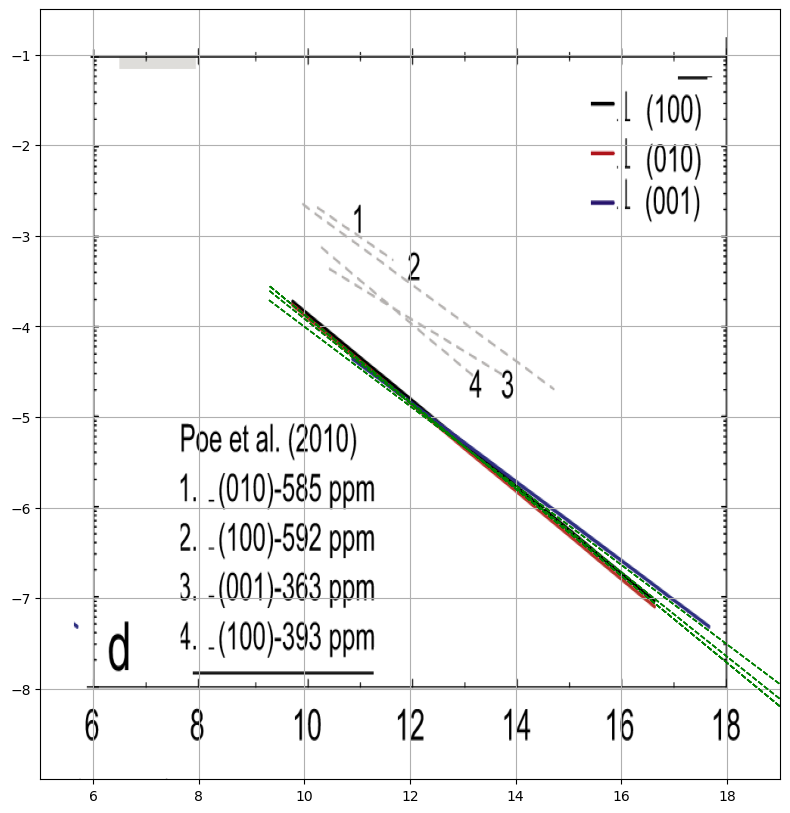

In [10]:
model = 'yang_12b_ol[100]'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=10,dtype=float).ravel()
model = ecdatabase.get_model(model)
logfo2 = pyrutils.calc_QFM(temperature_range,0)

for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i<2:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model in ['yang_12b_ol[100]','yang_12b_ol[010]','yang_12b_ol[001]',
                  'isotropic_model:yang_12b_ol[100]+yang_12b_ol[010]+yang_12b_ol[001]']:
        ecmodel = ecdatabase.get_model(model)
        
        if 'aniso' in model:
            linestyle='-'
            color='red'
        else:
            color = 'green'
            linestyle='--'
        for P in [0,4,7,10]:
            conductivity = np.log10(ecmodel.get_conductivity(T=temperature_range,P=P,logfo2=logfo2))
            ax.plot(1e4/temperature_range,conductivity,linestyle=linestyle,linewidth=1,color = color)
plt.xlim([5,19])
plt.ylim([-9,-0.5])

## Gardes et al., 2014. Bell 2003 Calibration

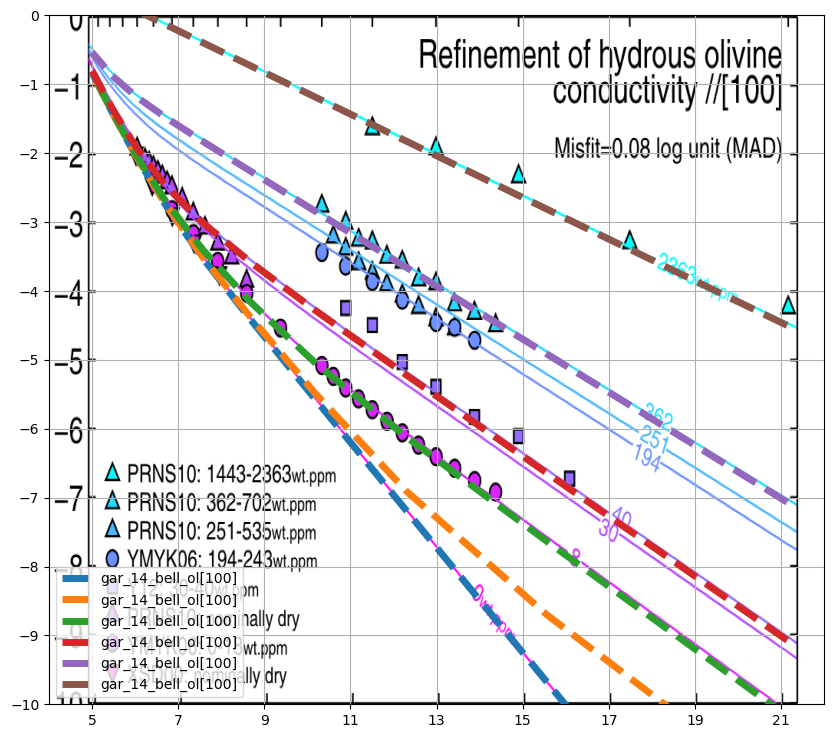

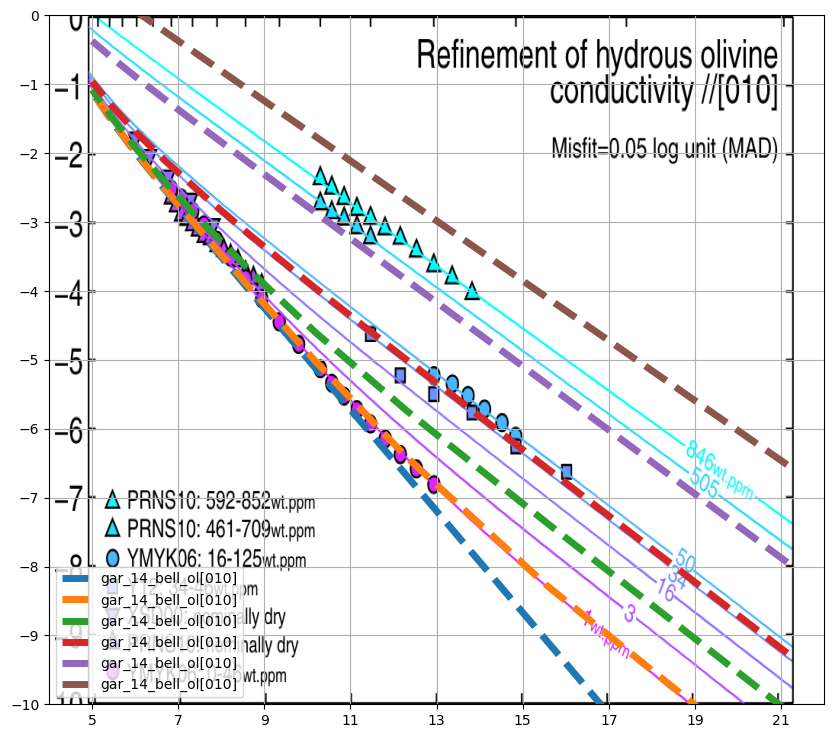

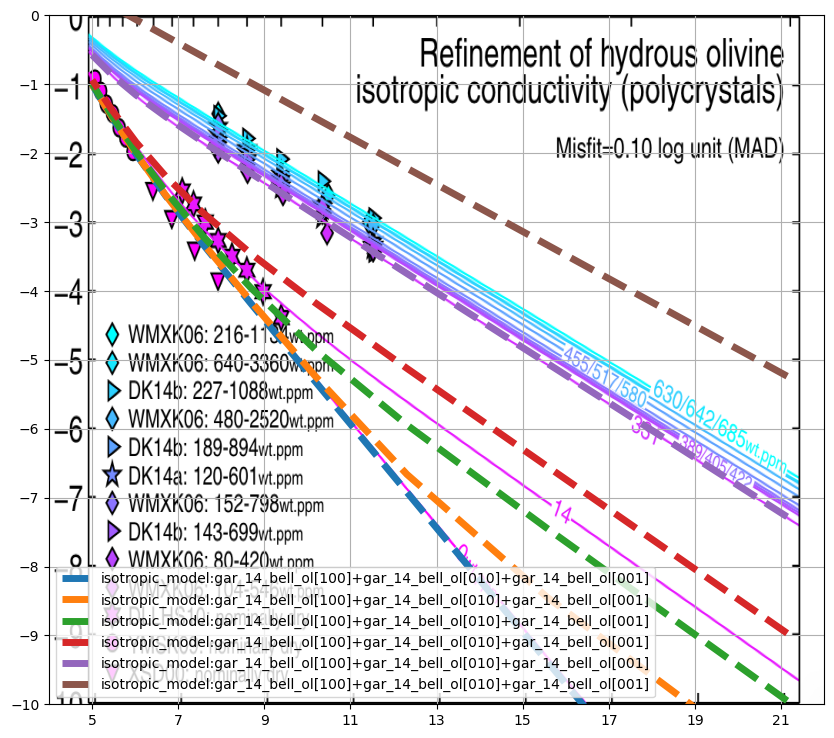

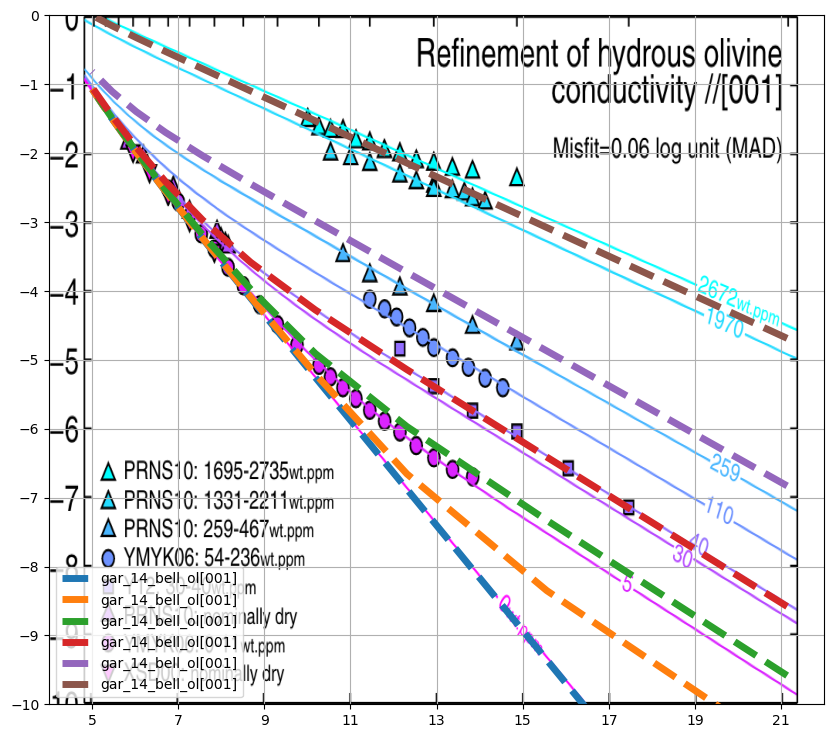

In [11]:
model = 'gar_14_bell_ol[100]'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=10,dtype=float).ravel()
model = ecdatabase.get_model(model)
logfo2 = pyrutils.calc_QFM(temperature_range,0)

for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    if i==0:
        model = 'gar_14_bell_ol[100]'
    elif i==1:
        model = 'gar_14_bell_ol[010]'
    elif i==2:
        model = 'isotropic_model:gar_14_bell_ol[100]+gar_14_bell_ol[010]+gar_14_bell_ol[001]'
    else:
        model = 'gar_14_bell_ol[001]'
    ecmodel = ecdatabase.get_model(model)
    for w in [0,1,8,40,362,2363]:
        conductivity = np.log10(ecmodel.get_conductivity(T=temperature_range,Cw=w))
        ax.plot(1e4/temperature_range,conductivity,linestyle=linestyle,linewidth=5,label=model)
    plt.xlim([4,22])
    plt.ylim([-10,0])
    plt.legend(loc='lower left')

## Gardes et al., 2014. Withers 2012 calibration

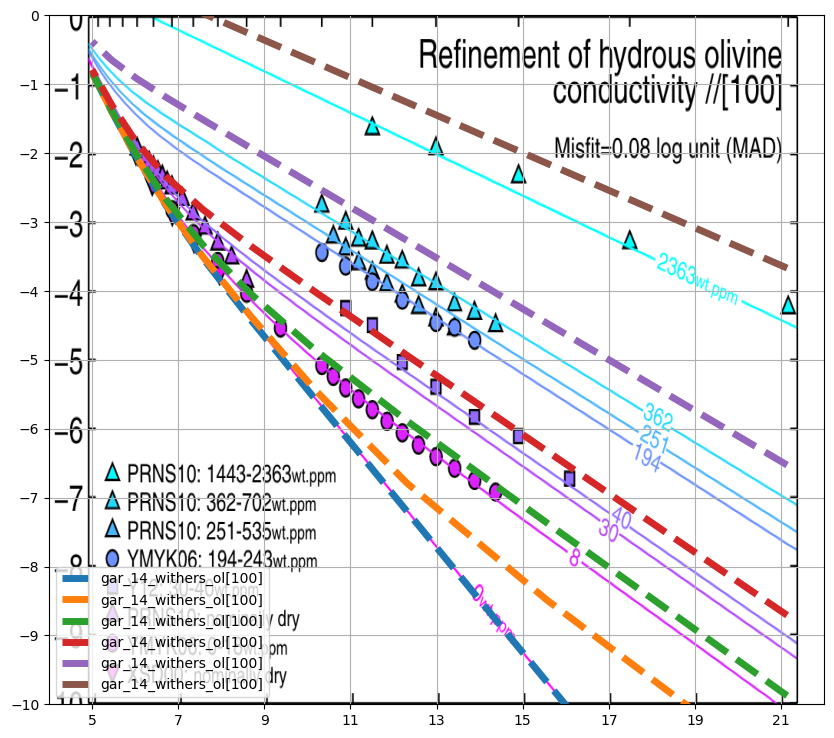

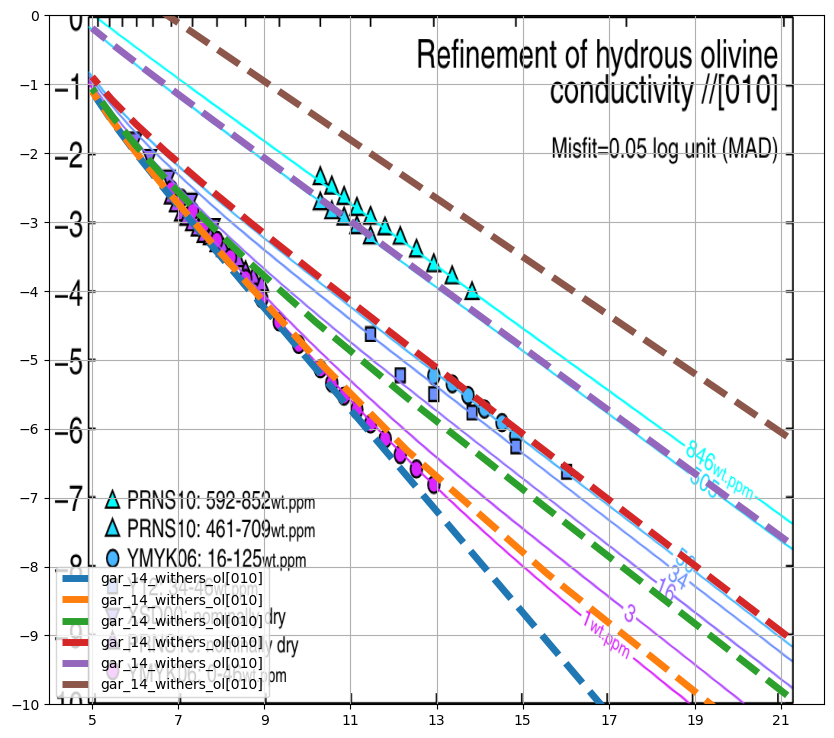

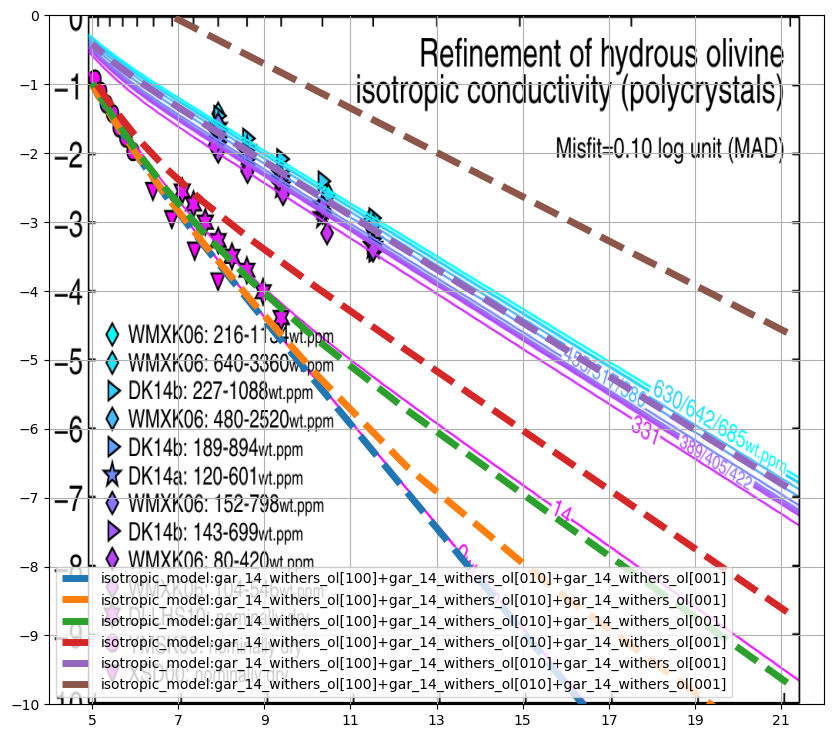

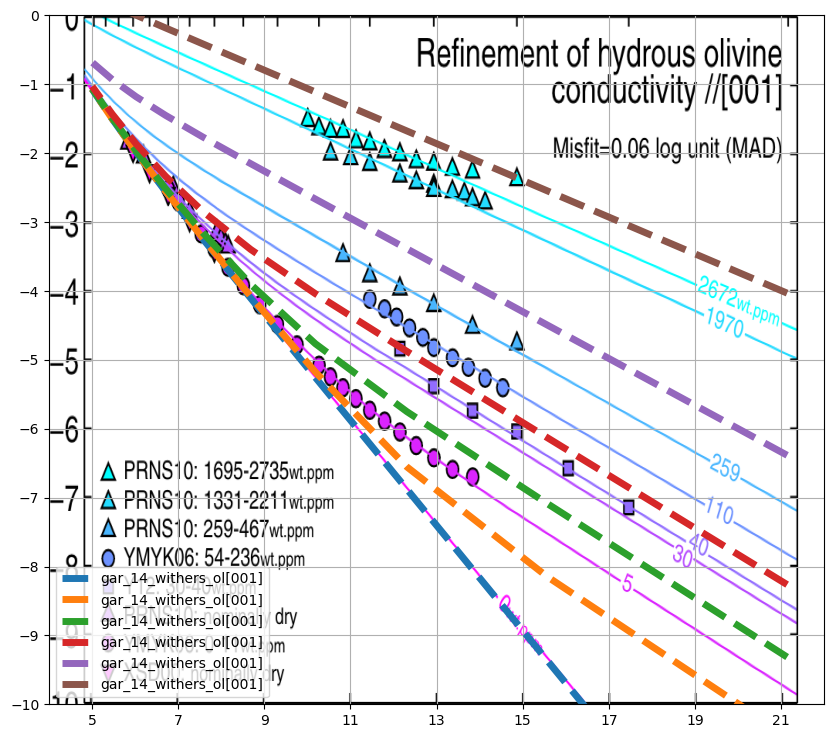

In [12]:
model = 'gar_14_withers_ol[100]'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=10,dtype=float).ravel()
model = ecdatabase.get_model(model)
logfo2 = pyrutils.calc_QFM(temperature_range,0)

for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    if i==0:
        model = 'gar_14_withers_ol[100]'
    elif i==1:
        model = 'gar_14_withers_ol[010]'
    elif i==2:
        model = 'isotropic_model:gar_14_withers_ol[100]+gar_14_withers_ol[010]+gar_14_withers_ol[001]'
    else:
        model = 'gar_14_withers_ol[001]'
    ecmodel = ecdatabase.get_model(model)
    for w in [0,1,8,40,362,2363]:
        conductivity = np.log10(ecmodel.get_conductivity(T=temperature_range,Cw=w))
        ax.plot(1e4/temperature_range,conductivity,linestyle=linestyle,linewidth=5,label=model)
    plt.xlim([4,22])
    plt.ylim([-10,0])
    plt.legend(loc='lower left')

## Yoshino et al., 2016

Could not exactly reproduce curves reported in publication, although parameterization is nearly identical

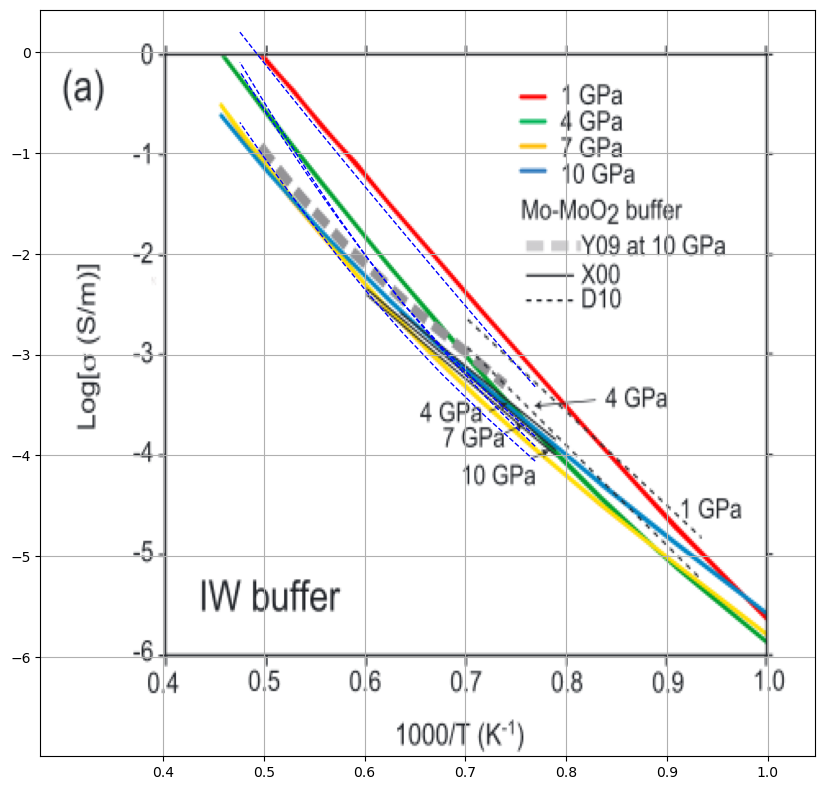

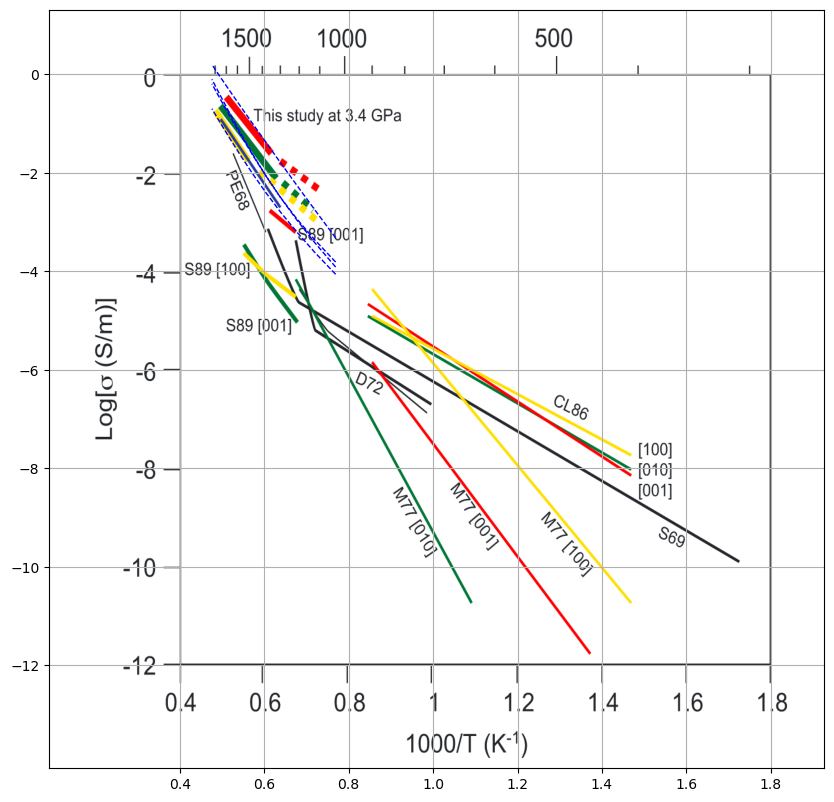

In [13]:
model = 'y_16_ol[100]'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=10,dtype=float).ravel()
model = ecdatabase.get_model(model)
logfo2 = pyrutils.calc_QFM(temperature_range,5)

for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model in ['isotropic_model:y_16_ol[100]+y_16_ol[010]+y_16_ol[001]']:
        ecmodel = ecdatabase.get_model(model)
        ecseo3 = ecdatabase.get_model('SEO3_ol')

        if 'aniso' in model:
            linestyle='-'
            color='black'
        else:
            color = 'blue'
            linestyle='--'
        for p in [1,4,7,10]:
            logfo2 = pyrutils.calc_QFM(temperature_range,p)
            if p==10:
                logfo2-=7
            conductivity = np.log10(ecmodel.get_conductivity(T=temperature_range,P=p)+ecseo3.get_conductivity(T=temperature_range,logfo2=logfo2))
            ax.plot(1e3/temperature_range,conductivity,linestyle=linestyle,linewidth=1,color = color)

## Novella et al., 2017

NerstEinstein2 1.8e+42(nan) 10^-0.7(0.9) 2.373417751(0.186556854) 
NerstEinstein2 1.8e+42(nan) 10^-5.0(0.9) 1.782654381(0.196921123) 
NerstEinstein2 1.8e+42(nan) 10^-3.5(0.4) 1.948482695(0.082914157) 


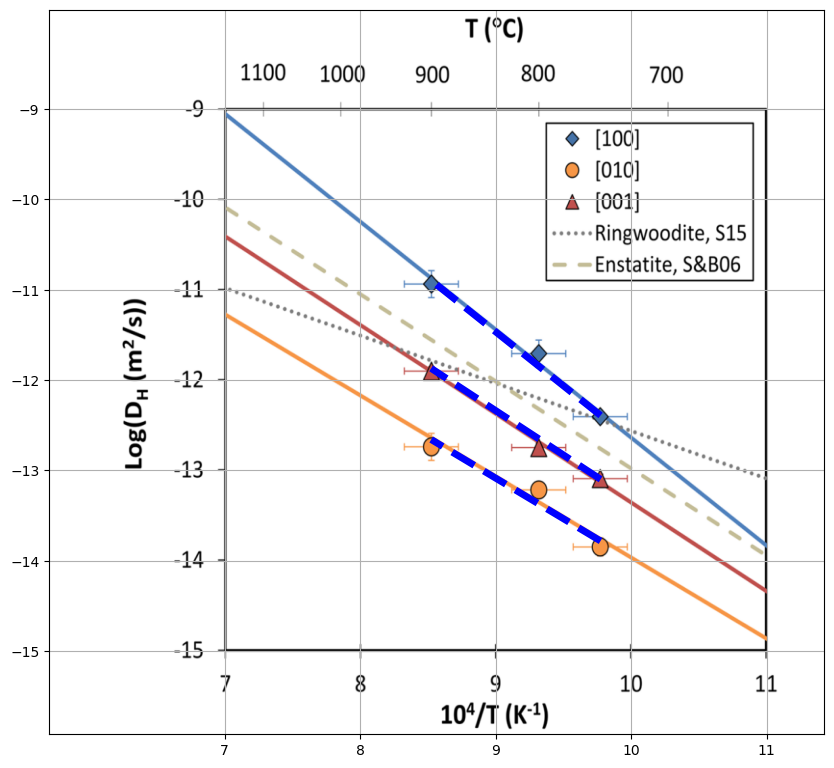

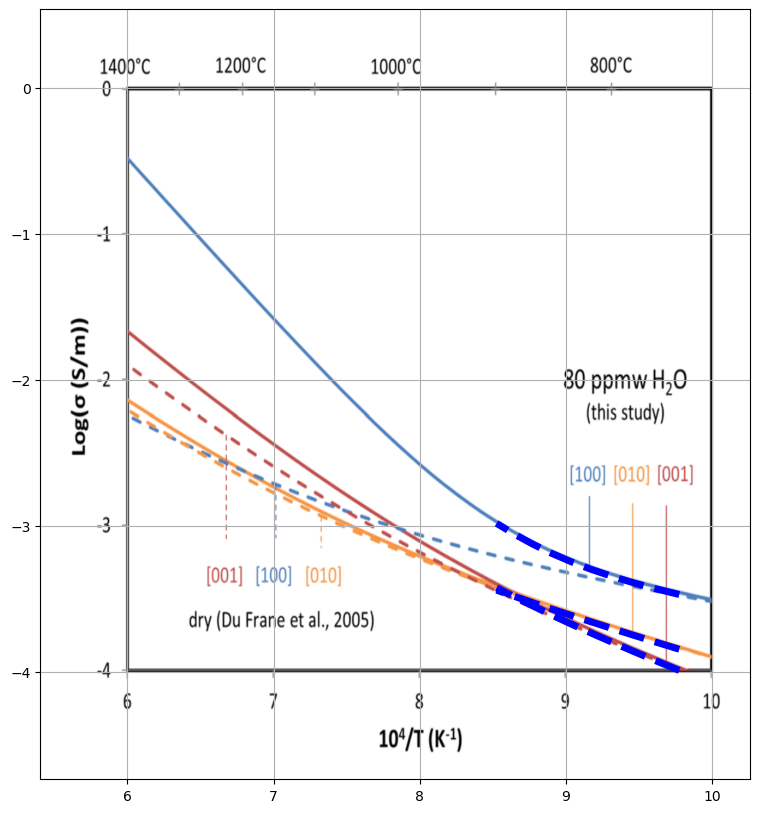

In [14]:
model = 'nv_17_ol[100]'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],
                                ec_model_row['temp_max'],num=10,dtype=float).ravel()
model = ecdatabase.get_model(model)
logfo2 = pyrutils.calc_QFM(temperature_range,0)

for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    if i==0:
        for model in ['nv_17_ol[100]','nv_17_ol[010]','nv_17_ol[001]',]:
            print(ecdatabase.get_model(model).mechanisms[0])
            cfactor = temperature_range*8.617333262e-5/(1.8e42*1.602176634e-19**2)
            c = ecdatabase.get_model(model).get_conductivity(T=temperature_range,Cw=1)*cfactor
            ax.plot(1e4/temperature_range,np.log10(c),linestyle=linestyle,linewidth=5,color = color)
       
    else:
        for model in [('nv_17_ol[100]','dF_05_ol[100]'),('nv_17_ol[010]','dF_05_ol[010]'),('nv_17_ol[001]','dF_05_ol[001]')]:
            ecmodel1 = ecdatabase.get_model(model[0]).get_conductivity(T=temperature_range,Cw=80)
            ecmodel2 = ecdatabase.get_model(model[1]).get_conductivity(T=temperature_range,logfo2=logfo2)
            ax.plot(1e4/temperature_range,np.log10(ecmodel1+ecmodel2),linestyle=linestyle,linewidth=5,color = color)
        

## Sun et al., 2019

/Volumes/MT_RESEARCH/2D_Petrology/mineral_conductivity/mineralconductivities/publication correspondence/../pyrrhenious/database.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subframe['grouping_id'] = subframe['entry_id'].str.slice(stop=-5)


dk_2009_ol
SEO2_ol
xu_2000_ol[001]
xu_2000_ol[010]
xu_2000_ol[100]
xu_2000_poly_ol
dF_05_ol[100]
dF_05_ol[010]
dF_05_ol[001]
SEO3_ol
wang_06_ol
ty_09_dry_ol
ty_09_ol
ty_12_ol
gar_14_bell_ol[100]
gar_14_bell_ol[010]
gar_14_bell_ol[001]
gar_14_withers_ol[100]
gar_14_withers_ol[010]
gar_14_withers_ol[001]
y_16_ol[100]
y_16_ol[010]
y_16_ol[001]
nv_17_ol[100]
nv_17_ol[010]
nv_17_ol[001]
sun_19ol[100]
sun_19ol[001]
fei_20_ol[100]
fei_20_ol[010]
fei_20_ol[001]
yang_12b_ol[100]
yang_12b_ol[010]
yang_12b_ol[001]
ty_09_dry_ol+sun_19ol[100]
ty_09_dry_ol+sun_19ol[001]
isotropic_model:dF_05_ol[100]+dF_05_ol[010]+dF_05_ol[001]
isotropic_model:fei_20_ol[100]+fei_20_ol[010]+fei_20_ol[001]
isotropic_model:gar_14_bell_ol[100]+gar_14_bell_ol[010]+gar_14_bell_ol[001]
isotropic_model:gar_14_withers_ol[100]+gar_14_withers_ol[010]+gar_14_withers_ol[001]
isotropic_model:nv_17_ol[100]+nv_17_ol[010]+nv_17_ol[001]
isotropic_model:sun_19ol[100]+sun_19ol[001]
isotropic_model:ty_09_dry_ol+sun_19ol[100]+ty_09_dry_ol

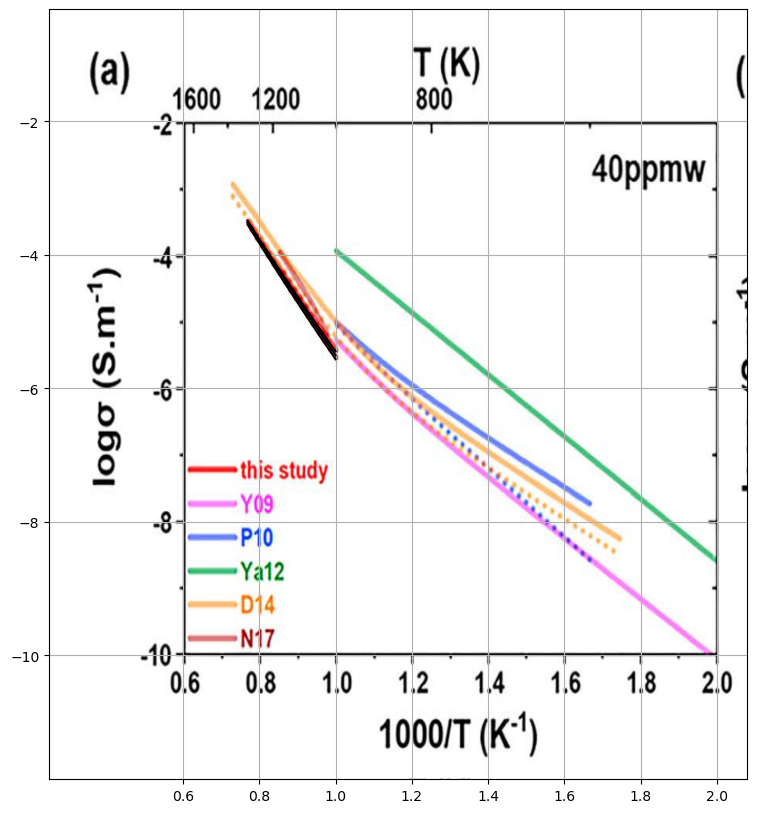

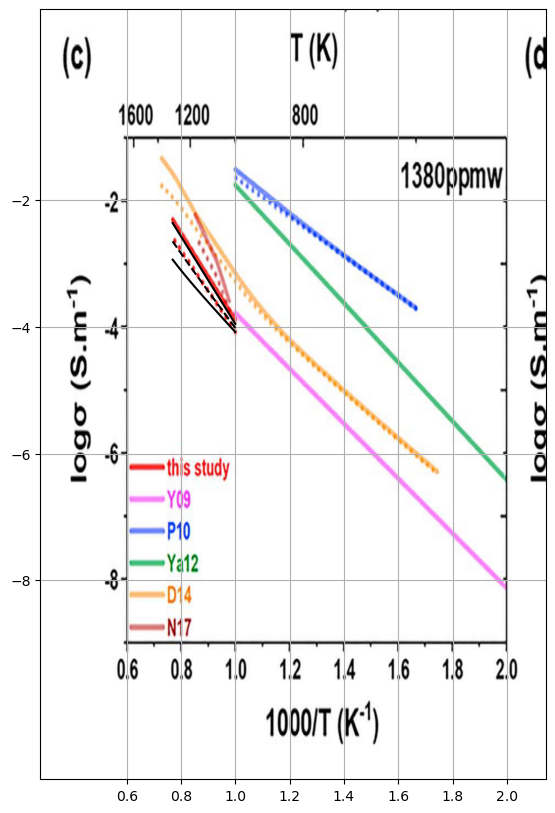

In [23]:
ecdatabase = database.Database(file)
new_models = []
for anisomodel in ['sun_19ol[100]','sun_19ol[001]']:
    new_models.append(ecdatabase.get_model(anisomodel) + ecdatabase.get_model('ty_09_dry_ol'))
ecdatabase.register_new_model(new_models)
ecdatabase.create_anisotropic_models()
for m in ecdatabase.get_model_list_for_phase('olivine'):
    print(m)
ec_model_row = ecdatabase.get_model_properties('sun_19ol[100]')
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],
                                ec_model_row['temp_max'],num=10,dtype=float).ravel()
logfo2 = pyrutils.calc_QFM(temperature_range,0)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i==1:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    if i==0:
        Cw=40/3 # FITR correction
        for model_name in ['ty_09_dry_ol+sun_19ol[100]','ty_09_dry_ol+sun_19ol[001]',
                           'isotropic_model:ty_09_dry_ol+sun_19ol[100]+ty_09_dry_ol+sun_19ol[001]']:
            ecmodel = ecdatabase.get_model(model_name)
            c = ecmodel.get_conductivity(T=temperature_range,Cw=Cw)
            ax.plot(1e3/temperature_range,np.log10(c),color='black')
            
    else:
        Cw=1380/3# FITR correction
        for model_name in ['ty_09_dry_ol+sun_19ol[100]','ty_09_dry_ol+sun_19ol[001]',
                           'isotropic_model:ty_09_dry_ol+sun_19ol[100]+ty_09_dry_ol+sun_19ol[001]']:
            if 'iso' in model_name:
                linestyle='--'
            else:
                linestyle='-'
            ecmodel = ecdatabase.get_model(model_name)
            c      = ecmodel.get_conductivity(T=temperature_range,Cw=Cw)
            ax.plot(1e3/temperature_range,np.log10(c),color='black',linestyle=linestyle)

## Fei et al., 2020

/Volumes/MT_RESEARCH/2D_Petrology/mineral_conductivity/mineralconductivities/publication correspondence/../pyrrhenious/database.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subframe['grouping_id'] = subframe['entry_id'].str.slice(stop=-5)


dk_2009_ol
SEO2_ol
xu_2000_ol[001]
xu_2000_ol[010]
xu_2000_ol[100]
xu_2000_poly_ol
dF_05_ol[100]
dF_05_ol[010]
dF_05_ol[001]
SEO3_ol
wang_06_ol
ty_09_dry_ol
ty_09_ol
ty_12_ol
gar_14_bell_ol[100]
gar_14_bell_ol[010]
gar_14_bell_ol[001]
gar_14_withers_ol[100]
gar_14_withers_ol[010]
gar_14_withers_ol[001]
y_16_ol[100]
y_16_ol[010]
y_16_ol[001]
nv_17_ol[100]
nv_17_ol[010]
nv_17_ol[001]
sun_19ol[100]
sun_19ol[001]
fei_20_ol[100]
fei_20_ol[010]
fei_20_ol[001]
yang_12b_ol[100]
yang_12b_ol[010]
yang_12b_ol[001]
isotropic_model:dF_05_ol[100]+dF_05_ol[010]+dF_05_ol[001]
isotropic_model:fei_20_ol[100]+fei_20_ol[010]+fei_20_ol[001]
isotropic_model:gar_14_bell_ol[100]+gar_14_bell_ol[010]+gar_14_bell_ol[001]
isotropic_model:gar_14_withers_ol[100]+gar_14_withers_ol[010]+gar_14_withers_ol[001]
isotropic_model:nv_17_ol[100]+nv_17_ol[010]+nv_17_ol[001]
isotropic_model:sun_19ol[100]+sun_19ol[001]
isotropic_model:xu_2000_ol[001]+xu_2000_ol[010]+xu_2000_ol[100]
isotropic_model:y_16_ol[100]+y_16_ol[010]+y_1

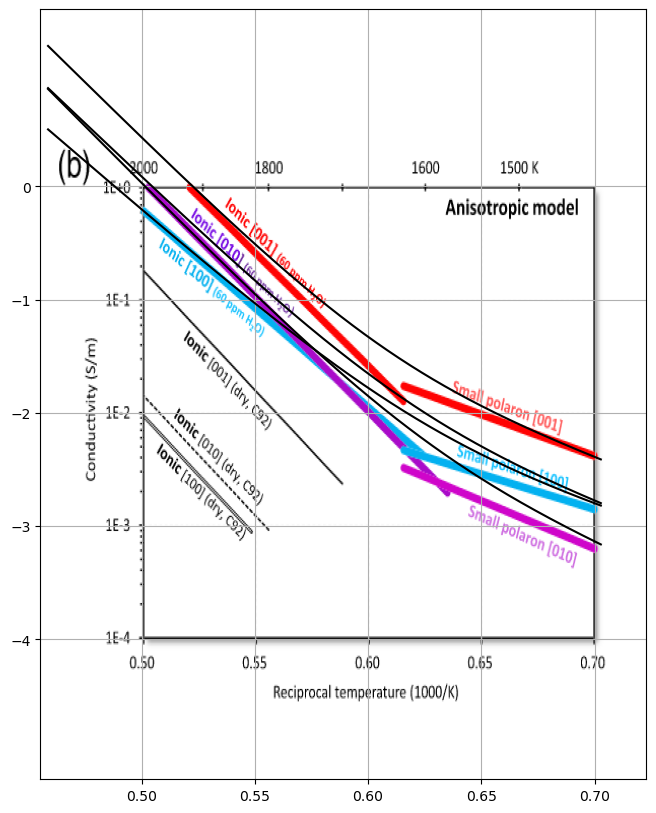

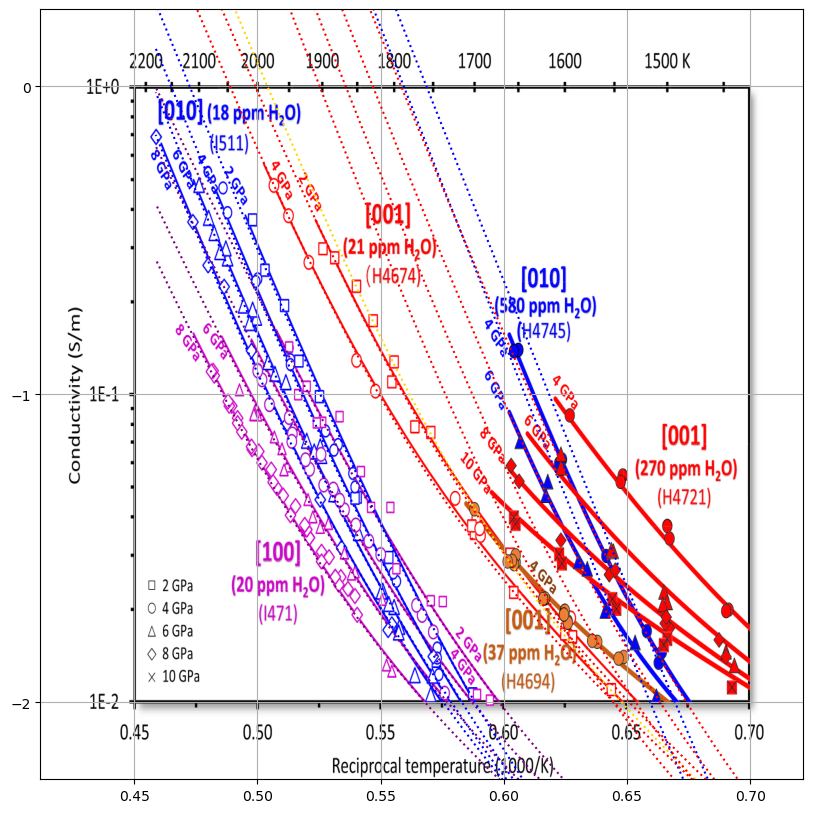

In [30]:
ecdatabase = database.Database(file)
ecdatabase.create_anisotropic_models()
for m in ecdatabase.get_model_list_for_phase('olivine'):
    print(m)
phases = ecdatabase.get_phases()
model = 'fei_20_ol[100]'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(1423,
                                ec_model_row['temp_max'],num=1000,dtype=float).ravel()
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    if i==0:
        for model_name in ['isotropic_model:fei_20_ol[100]+fei_20_ol[010]+fei_20_ol[001]','fei_20_ol[100]','fei_20_ol[010]','fei_20_ol[001]']:
            ecmodel = ecdatabase.get_model(model_name)
            conductivity1 = np.log10(ecmodel.get_conductivity(T=temperature_range,Cw=60,P=3))
            ax.plot(1e3/temperature_range,conductivity1,color='black')
    if i==1:
        ecmodel = ecdatabase.get_model('fei_20_ol[100]')
        linestyle=':'
        color='purple'
        for P in [2,4,6,8]:
            conductivity1 = np.log10(ecmodel.get_conductivity(T=temperature_range,Cw=20,P=P))
            ax.plot(1e3/temperature_range,conductivity1,color=color,linestyle=linestyle)
        
        ecmodel = ecdatabase.get_model('fei_20_ol[010]')
        color = 'blue'
        for P in [2,4,6,8]:
            conductivity1 = np.log10(ecmodel.get_conductivity(T=temperature_range,Cw=18,P=P))
            ax.plot(1e3/temperature_range,conductivity1,color=color,linestyle=linestyle)
        for P in [4,2]:
            conductivity1 = np.log10(ecmodel.get_conductivity(T=temperature_range,Cw=580,P=P))
            ax.plot(1e3/temperature_range,conductivity1,color=color,linestyle=linestyle)
    
        ecmodel = ecdatabase.get_model('fei_20_ol[001]')
        color = 'red'
        for P in [2,4]:
            conductivity1 = np.log10(ecmodel.get_conductivity(T=temperature_range,Cw=21,P=P))
            ax.plot(1e3/temperature_range,conductivity1,color=color,linestyle=linestyle)
        
        for P in [4]:
            conductivity1 = np.log10(ecmodel.get_conductivity(T=temperature_range,Cw=37,P=P))
            ax.plot(1e3/temperature_range,conductivity1,color='gold',linestyle=linestyle)
        
        for P in [4,6,8,10]:
            conductivity1 = np.log10(ecmodel.get_conductivity(T=temperature_range,Cw=270,P=P))
            ax.plot(1e3/temperature_range,conductivity1,color=color,linestyle=linestyle) 
        
        ax.set_ylim([-2.25,0.25])

